# Cross-correlation loss

In [1]:
import torch

from lossfunctions.cross_correlation import CrossCorrelationLoss

In [2]:
loss = CrossCorrelationLoss(8)

coeffs = torch.randn(45).to('mps').unsqueeze(0)
coeffs2 = torch.randn(45).to('mps').unsqueeze(0)

loss(coeffs,coeffs)/torch.sqrt(torch.sum(torch.square(coeffs)) * torch.sum(torch.square(coeffs)))

tensor(1., device='mps:0')

In [4]:
torch.sum(torch.square(coeffs)) + torch.sum(torch.square(coeffs)) - 2*loss(coeffs,coeffs)

tensor(0., device='mps:0')

# Data loader

In [1]:
from dataloader.load_dt_simulated import load_dt_simulated_dataset

In [2]:
data = load_dt_simulated_dataset(dataset_size=10000000,
                          number_of_fibre_populations=3,
                          max_degree=8,
                          fibre_population_eigenvalues=[(0.001, 0.0003, 0.0003),(0.0003, 0.001, 0.0003),(0.0003, 0.0003, 0.001)],
                          number_of_data_points=90,
                          b_value=1000,
                          b_0_signal=1,
                          include_b_0=False,
                          signal_to_noise_ratio=30,
                          noise_type='rician',
                          noise_generator_seed=100,
                          gradient_generator_seed=101,
                          fibre_orientation_generator_seed=102,
                          planar=True)

Generating fibre orientations and volume fractions...
Generating fODF spherical harmonics coefficients...
Setting diffusion tensor eigenvalues...
Generating diffusion tensor eigenvectors...
Simulating DW signals...


In [4]:
from dataloader.load_dt_simulated import save_dt_simulated_dataset

path = './data2/planar/no_rotation'
        
save_dt_simulated_dataset(data, path)

In [3]:
data[0][1]

array([ 2.82094792e-01, -1.62372936e-01,  0.00000000e+00, -5.43802553e-02,
        0.00000000e+00,  9.92402162e-02,  2.49845948e-01,  0.00000000e+00,
        1.40619087e-01, -2.24272820e-17,  4.63266399e-01, -1.71175377e-18,
       -8.59445483e-02,  0.00000000e+00, -1.07408184e-01,  4.16321309e-01,
        0.00000000e+00, -2.01432243e-01, -2.42521471e-17, -1.36908167e-01,
        4.42418842e-17,  5.04135685e-02,  3.37674500e-18,  8.36764820e-02,
       -4.34827456e-17,  8.65952461e-02,  0.00000000e+00,  2.57201416e-01,
       -2.40977254e-02,  0.00000000e+00, -3.24394950e-01,  1.31923641e-17,
        1.90993296e-01,  4.54208922e-17,  1.35585351e-01, -6.59179222e-17,
        5.51157488e-01, -5.03116036e-18, -8.28679946e-02,  8.14371238e-17,
       -8.21075676e-02, -2.08511742e-17, -2.00409729e-01,  0.00000000e+00,
        1.87223799e-01])

In [4]:
from functools import partial
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd

from models.sphericaldeconvolution.spherical_deconvolution import spherical_deconvolution_fit
from models.sphericaldeconvolution.fibre_response_function import simple_fibre_response_function, diffusion_tensor_response_function
from dataloader.load_dt_simulated import load_dt_simulated_multiple_populations
from preprocessing.data_augmentation import extend_dataset_with_origin_reflections
from preprocessing.data_transformations import convert_coords_from_cartesian_to_spherical
from visualization.spherical_functions_visualisation import get_spherical_function_values_from_spherical_expansion

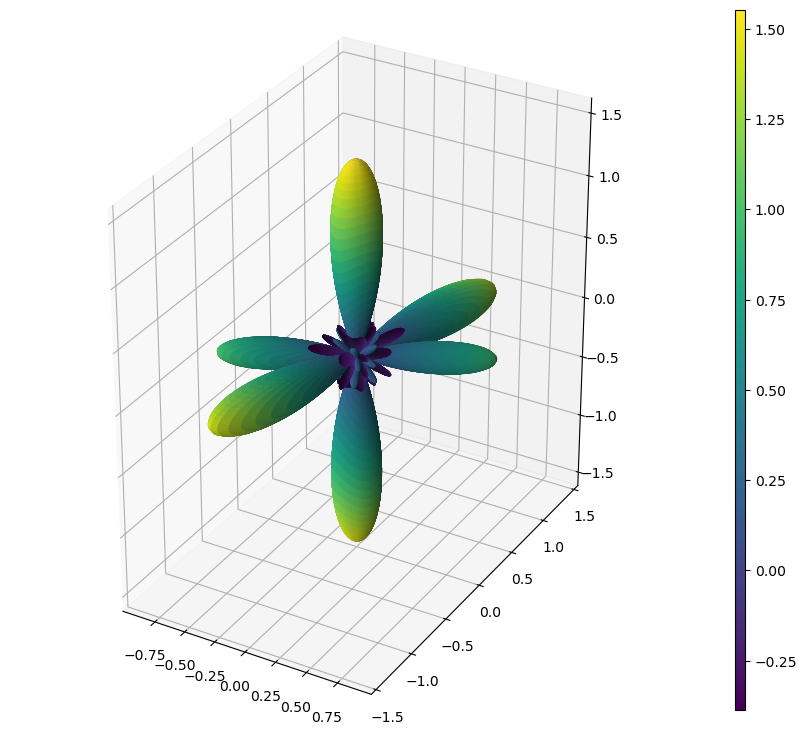

In [10]:
x, y, z, fcolors = get_spherical_function_values_from_spherical_expansion(data[0][9],max_degree=8,resolution=200,min_value=None,max_value=None, normalize=False)

x = x * fcolors
y = y * fcolors
z = z * fcolors

fig = plt.figure(figsize=(10,10))

cmap = plt.cm.viridis
normalization = Normalize(vmin=np.min(fcolors), vmax=np.max(fcolors))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalization)

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=plt.cm.viridis(normalization(fcolors)), shade=True)
#ax.set_axis_off()
plt.gca().set_aspect('equal')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sm, ax=[ax], cax=cbar_ax)

plt.show()

# Multiprocessing

In [1]:
import multiprocessing

In [2]:
print("Number of cpu : ", multiprocessing.cpu_count())

Number of cpu :  12


In [2]:
from utils.test_worker import main, hash_word

main()

<class 'numpy.ndarray'>
<class 'list'>
[(0.867965290007741, 1.867965290007741), (0.9612228278389066, 1.9612228278389066), (0.4315516021038266, 1.4315516021038266), (0.6099616459337621, 1.6099616459337622), (0.5633595493067229, 1.563359549306723), (0.8213059279304693, 1.8213059279304693), (0.5137782895464704, 1.5137782895464704), (0.3350059090860372, 1.3350059090860373), (0.6381156476287936, 1.6381156476287937), (0.004493453783756318, 1.0044934537837564), (0.8132633836909182, 1.8132633836909182), (0.7571507751762853, 1.7571507751762852), (0.32768808611037814, 1.3276880861103781), (0.5260313462572175, 1.5260313462572175), (0.10993230210640059, 1.1099323021064005), (0.5311337427672019, 1.531133742767202), (0.6955622680407046, 1.6955622680407045), (0.3402876229821604, 1.3402876229821605), (0.8170573296848797, 1.8170573296848795), (0.08981667158642426, 1.0898166715864241), (0.7375437502236406, 1.7375437502236406), (0.5998663444396414, 1.5998663444396413), (0.8888779825224418, 1.888877982522

In [3]:
from functools import partial

In [5]:
def xfunc(a,b):
    print('a ',a)
    print('b ',b)

In [6]:

partfunc = partial(xfunc, a=5)

In [7]:
partfunc(6)

TypeError: xfunc() got multiple values for argument 'a'